<a href="https://colab.research.google.com/github/smaciasg/DataScience2022-3/blob/main/Preparaci%C3%B3n_BeltExam3_Aprendizaje_no_supervisado%2C_PCA%2C_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulación del examen de cinturón (práctica)**

**Nota:** Es posible que durante el examen del cinturón real haya más de un conjunto de datos para importar.

**Problema**
Una empresa de aerolínea le gustaría saber más sobre sus clientes y cómo satisfacerlos.  Han proporcionado cierta información sobre 20 000 clientes, así como los resultados de una entrevista de satisfacción.  Los datos están disponibles aquí.

*Ellos quieren que hagas:*

1. Una segmentación de los clientes en grupos y describir esos grupos, qué tienen en común y en qué se diferencian.

2. Un modelado de datos para ver si la satisfacción general de los clientes se puede predecir por la información de sus vuelos y las respuestas a la entrevista, además de la satisfacción general.

**Instrucciones de agrupamiento: La empresa de aerolínea quiere que segmentes a los clientes y crees un informe analítico sobre los clústeres describiendo cada grupo y describiendo cómo son de diferentes.**

1. Carga los datos.

2. Explora los datos.

3. Prepara los datos para el modelado.

4. Utiliza un modelo k-medias para agrupar a los estudiantes en un número óptimo de clústeres. 

  Utiliza un trazado de codo y una puntuación de silueta para encontrar el número óptimo de clústeres.
  Debe haber entre 2 y 10 clústeres.
5. Analiza e informa sobre los clústeres.
* Describe cada clúster.
* ¿En qué se diferencian los clústeres?
* Crea 2 visualizaciones explicativas de calidad del informe que muestren las diferencias importantes entre los clústeres.
* Interpreta y explica cada visualización.

**Instrucciones de modelado: A la aerolínea también le gustaría saber si la satisfacción general se puede predecir bien a partir de la información de los pasajeros y la satisfacción con partes específicas de su experiencia. Tu objetivo será la columna “satisfied”.**

1. Utiliza random_state = 42 para tu train_test_split.

2. Aplica ACP para reducir el número de características a un número más razonable.

  Indica cuántas columnas menos hay después del ACP.
  Indica la cantidad de varianzas retenidas después del ACP.
3. No filtres los datos.

4. Utiliza un modelo de aprendizaje profundo para predecir si los clientes informarán que estuvieron satisfechos.

* Crea 3 versiones diferentes de un modelo secuencial.
* Cada modelo nuevo debe ser una iteración en el modelo anterior.
* Justifica por escrito por qué cambiaste lo que hiciste para cada modelo.
* Por ejemplo, por qué agregaste capas, regularización, nodos, etc.
* Utiliza alguna forma de regularización con al menos un modelo.
* Evalúa cada modelo con las métricas adecuadas.

5. Elije un modelo final y justifica tu decisión.

6. Explica por escrito en qué medida tu modelo resolverá el problema empresarial.

#**AGRUPAMIENTO**

###**1) Importar las librerías necesarias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

###**2) Cargar los datos y explorar**

In [2]:
pasajeros_vuelos = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/PREPARACIÓN BELT EXAM3/flight_df - flight_df.csv')
pasajeros_vuelos.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [3]:
pasajeros_vuelos.info()
#Se observa que no hay datos nulos, y todos son del tipo int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                20000 non-null  int64
 1   Class                              20000 non-null  int64
 2   Flight Distance                    20000 non-null  int64
 3   Inflight wifi service              20000 non-null  int64
 4   Departure/Arrival time convenient  20000 non-null  int64
 5   Ease of Online booking             20000 non-null  int64
 6   Gate location                      20000 non-null  int64
 7   Food and drink                     20000 non-null  int64
 8   Online boarding                    20000 non-null  int64
 9   Seat comfort                       20000 non-null  int64
 10  Inflight entertainment             20000 non-null  int64
 11  On-board service                   20000 non-null  int64
 12  Leg room service  

In [4]:
#Validación de datos duplicados
pasajeros_vuelos.duplicated().sum()
#No hay datos duplicados

0

In [5]:
#Vamos a describir el dataset para tratar de identificar valores anormales en las variables que se presentan
pasajeros_vuelos.describe()
#Al parecer no hay datos anormales en el conjunto de datos.

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


###**3) Preparar los datos para el modelado**

**Escalado de los datos**

Dado que todos los datos son numéricos lo único que se deberá hacer es escalarlos, para tal motivo se hará uso de un escalador MinMax, más aún que más adelante se usarán redes neuronales y dentro de los valores que estamos trabajando los valores no requieren valores negativos.

In [6]:
scaler = MinMaxScaler()

In [7]:
pasajeros_vuelos['satisfied'].value_counts()

0    11339
1     8661
Name: satisfied, dtype: int64

**Se ajusta el escalador al conjunto de datos**

In [8]:
scaler_pasajeros = scaler.fit_transform(pasajeros_vuelos)
X_scaled = pd.DataFrame(scaler.fit_transform(pasajeros_vuelos), columns=pasajeros_vuelos.columns)
X_scaled.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0.243590,1.0,0.410137,0.4,0.6,0.6,0.6,0.4,0.4,0.25,...,0.50,0.50,0.6,0.4,0.000000,0.000000,0.0,1.0,1.0,0.0
1,0.576923,1.0,0.131058,1.0,1.0,1.0,1.0,0.6,0.8,0.75,...,0.75,0.75,0.8,0.8,0.013793,0.001563,0.0,1.0,1.0,1.0
2,0.269231,0.0,0.031704,0.6,1.0,0.6,0.8,0.6,0.6,0.50,...,0.75,0.75,1.0,0.6,0.000000,0.000000,1.0,1.0,0.0,0.0
3,0.602564,1.0,0.085218,0.6,1.0,1.0,1.0,0.6,0.8,0.75,...,0.50,0.75,0.6,0.2,0.069732,0.062500,0.0,1.0,1.0,0.0
4,0.423077,0.0,0.150242,0.8,0.6,0.6,0.6,0.8,0.8,0.75,...,0.50,0.50,0.6,0.8,0.000000,0.000000,1.0,1.0,1.0,0.0


###**4) Aplicación del modelo k-medias** 

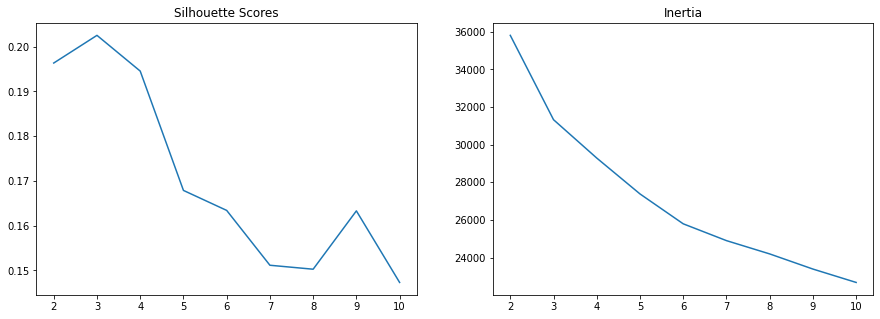

In [9]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [10]:
for i in range(len(inertias)):
  if i < len(inertias)-1:
    print(f'C{i+2} - C{i+3}: Decremento: {inertias[i+1]-inertias[i]}')

C2 - C3: Decremento: -4484.367255603029
C3 - C4: Decremento: -2039.7215638352718
C4 - C5: Decremento: -1907.3225338942902
C5 - C6: Decremento: -1589.0758319667038
C6 - C7: Decremento: -893.8470776040231
C7 - C8: Decremento: -706.8279790474662
C8 - C9: Decremento: -804.8751372816187
C9 - C10: Decremento: -711.7045106370279


De acuerdo a lo observado tanto en la puntucación de silueta como en el método del codo, la mejor opción es escojer un total de 3 clúster, como vemos en el método del codo, entre el segundo y tercer clúster se produce una gran variación, lo que indica que son grupos separados, lueto del cuarto clúster esta variabilidad disiminuye lo que ocasiona que los grupos sean muy parecidos entre sí.

**CREACIÓN DEL MODELO DE K-MEDIAS CON LA CANTIDAD DE CLÚSTERS ELEGIDOS**

In [11]:
# Se refina kmeans con los 3 clúster
kmeans = KMeans(n_clusters=3, random_state=42)
#Se ajusta el modelo al conjunto de datos ya escalado
kmeans.fit(X_scaled)
# Se añade la columna de la clasificación del clúster al dataframe original
pasajeros_vuelos['cluster'] = kmeans.labels_
pasajeros_vuelos.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,2
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,2
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,2


###**5) Describe y analiza los clústers**

**Analizar los clústers**

In [12]:
cluster_groups = pasajeros_vuelos.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,38.573465,1.223068,787.375668,2.498623,3.657055,2.454722,2.921756,3.083590,2.787948,...,3.569415,3.336303,3.612182,3.135752,14.261137,14.555484,0.489227,0.995788,0.000162,0.090718
1,1,42.728297,2.733869,1635.560249,3.178025,2.940788,3.027857,2.994947,3.635009,4.158590,...,4.004924,3.690205,3.998575,3.865509,12.669215,12.795284,0.504924,0.926535,0.991060,0.995595
2,2,36.283189,1.948928,1029.175970,2.391062,2.594533,2.700933,2.991652,2.774922,2.586348,...,3.196759,2.779669,3.200524,2.694713,16.459650,17.246685,0.474055,0.500737,0.999836,0.068260


In [13]:
cluster_groups2 = pasajeros_vuelos.groupby('cluster', as_index=False).median()
cluster_groups2

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,39.0,1.0,624.0,3.0,4.0,2.0,3.0,3.0,3.0,...,4.0,3.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,44.0,3.0,1521.0,3.0,3.0,3.0,3.0,4.0,4.0,...,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0
2,2,35.0,2.0,696.0,2.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


**Visualizar los clústeres**

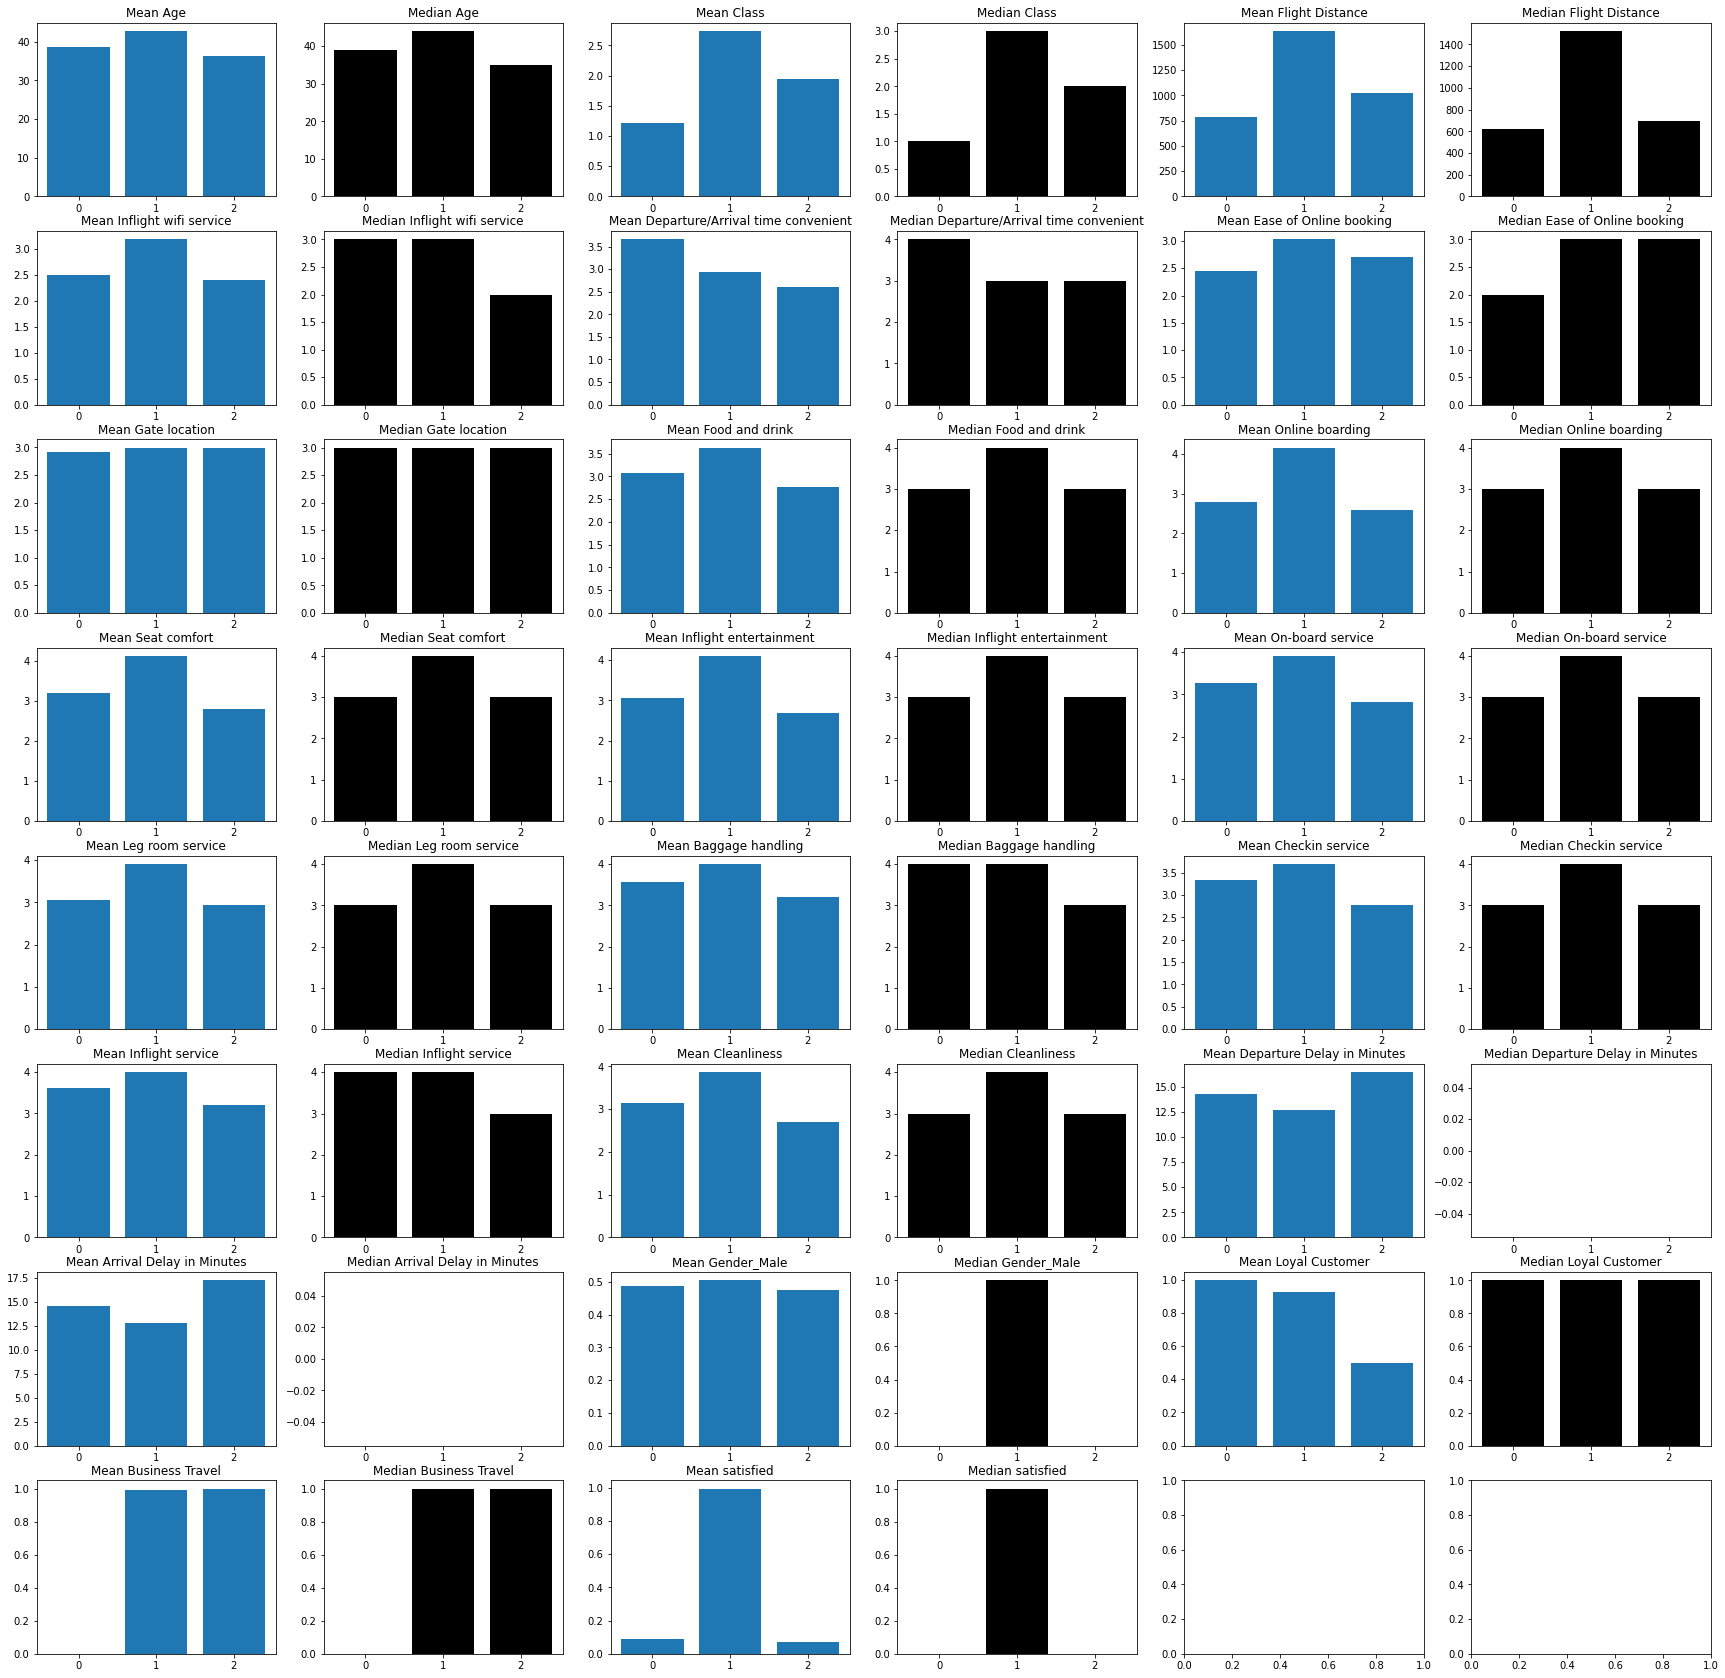

In [14]:
# Visualizaciones de los grupos
fig, axes = plt.subplots(8,6, figsize = (30, 30))
axes = axes.ravel()
lista_i = []
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[len(lista_i)].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[len(lista_i)].set_title(f'Mean {col}')
  axes[len(lista_i)].set_xticks([0,1,2])
  axes[len(lista_i)+1].bar(cluster_groups2['cluster'], cluster_groups2[col] , color='black')
  axes[len(lista_i)+1].set_title(f'Median {col}')
  axes[len(lista_i)+1].set_xticks([0,1,2])
  lista_i.append(len(lista_i))
  lista_i.append(len(lista_i)+1)

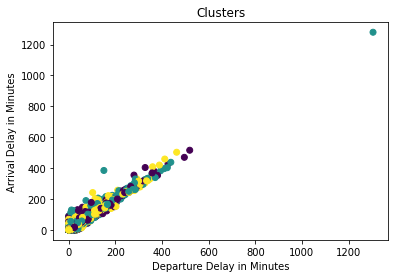

In [15]:
# Save the cluster labels to the dataframe
pasajeros_vuelos['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(pasajeros_vuelos['Departure Delay in Minutes'], pasajeros_vuelos['Arrival Delay in Minutes'], c = pasajeros_vuelos['cluster'])
plt.xlabel('Departure Delay in Minutes')
#plt.xticks(pasajeros_vuelos['Departure Delay in Minutes'].unique())
plt.ylabel('Arrival Delay in Minutes')
#plt.yticks(pasajeros_vuelos['Arrival Delay in Minutes'].unique())
plt.title('Clusters');

**Interpretación de los clústers**

**Clúster 0:**

La mayoría de las personas se encuentra cerca de los 40 años, la mayoría viaja en clase 1.0, su distancia media de vuelo es la menor, su calificación para el servicio del wifi a bordo es en su mayoría cercana a 3.0, la puntuación respecto a la hora de llegada y de salida es la más alta, casi siempre es 4.0 su calificación, es el grupo de personas que más baja calificación da a la facilidad de poder reservar en línea, la puntuación frecuente es de 2.0. En relación a la sala de espera no se observa una diferencia importante con los demás clústeres, su calificación para la comida y bebida presentan la segunda mejor calificación promedio, aunque en general, casi siempre tienen la misma calificación que el clúster 2, el embarque en línea presenta el segundo mejor desempeño, pero algunas personas tienen una experiencia poco favorable,  respecto los asientos este grupo es el segundo en mejor puntuación, en general los pasajeros se sienten cómodos con sus asientos, el entretenimiento durante el vuelo, tiene la segunda mejor puntuación, aunque lejos del clúster 1, el servicio a bordo está bien calificado, es el segundo mejor, igualmente ocurre con el servicio de equipaje de mano, en esta caso muy cercano al servicio del clúster 1, el servicio del checkin es de calidad, respecto al mejor puntuado, algunos pasajeros lo consideran muy bueno. La limpieza es un factor bien calificado, superando al clúster 2, la salida tarda menos de 15 minutos, muy cercana al mejor servicio. Este cliente es el cliente más leal, es muy probable que no viajen por negocios, y la mayoría se encuentra insatisfecho, lo cual comparten con el clúster 2, viajan en su mayoría cliente del género 0. Es un cliente leal, que se siente en general cómodo en el vuelo, el servicio podría ser mejor y puede tener oportunidades de mejora en la facilidad para adquirir el vuelo y el proceso de registro y embarque, podría tener algún tipo de beneficio por ser cliente leal.

**Clúster 1:**

La mayoría de las personas se encuentra superando los 40 años, es el clúster de mayor edad promedio, la mayoría viaja en clase3.0, su distancia media de vuelo es la mayor, su calificación para el servicio del wifi a bordo es en su mayoría supera a 3.0, la puntuación respecto a la hora de llegada y de salida es la más baja junto con el clúster 2, casi siempre es 3.0 su calificación, es el grupo de personas que más alta calificación da a la facilidad de poder reservar en línea, la puntuación frecuente es de 3.0. En relación a la sala de espera no se observa una diferencia importante con los demás clústeres, su calificación para la comida y bebida presentan la mejor calificación promedio, casi siempre tienen la calificación de 4.0, el embarque en línea presenta el mejor desempeño, casi siempre las personas tienen una experiencia favorable,  respecto los asientos este grupo es el de mejor puntuación, en general los pasajeros se sienten  muy cómodos con sus asientos, el entretenimiento durante el vuelo, tiene la mejor puntuación, siendo este grupo el que cuenta con el mejor entretenimiento, el servicio a bordo está bien calificado, es el mejor, igualmente ocurre con el servicio de equipaje de mano , el servicio del checkin es el mejor. La limpieza es un factor bien calificado, la salida/llegada tarda menos de 12.5 minutos, presenta el mejor servicio a bordo. Este cliente es por lo general leal, y la mayoría se encuentra satisfecho y sus viajes son por negocios. Estos clientes deben ser de primera clase, pues en general sus servicios son los mejores, es probable que se busquen medios de fidelización. 

**Clúster 2:**

La mayoría de las personas se encuentra cercano a los 35 años, la mayoría viaja en clase 2.0, su distancia media de vuelo es la segunda, pero cercana a la más baja, su calificación para el servicio del wifi a bordo es en su mayoría cercana a 2.0, la puntuación respecto a la hora de llegada y de salida es la más baja, casi siempre es 3.0 su calificación, es el grupo de personas que con segunda calificación más alta para el aspecto relacionado con la facilidad de poder reservar en línea, la puntuación frecuente es de 3.0. En relación a la sala de espera no se observa una diferencia importante con los demás clústeres, su calificación para la comida y bebida presentan la peor calificación promedio, el embarque en línea presenta el peor mejor desempeño, solo un poco peor que el clúster 0,  respecto los asientos este grupo con la peor puntuación, en general los pasajeros no se sienten cómodos con sus asientos, el entretenimiento durante el vuelo, tiene la peor puntuación, el servicio a bordo está mal calificado, es el peor, igualmente ocurre con el servicio de equipaje de mano, el servicio del checkin es de calidad, respecto al mejor puntuado. La limpieza es un factor bien calificado, pero en ocasiones podría ser deficiente, la salida tarda más de 15 minutos y la llegada más de 17 min. Este cliente es el cliente menos leal, es muy probable que viajen por negocios, y la mayoría se encuentra insatisfecho, lo cual comparten con el clúster 0, viajan en su mayoría cliente del género 0. Es un cliente poco leal, que se siente en general incómodo en el vuelo, el servicio podría ser mejor y puede tener oportunidades de mejora en la facilidad para adquirir el vuelo y el proceso de registro y embarque, si sus condiciones mejorar podría considerar usar de manera más frecuente la aerolínea.


#**APRENDIZAJE PROFUNDO**

In [16]:
pasajeros_vuelos['satisfied'].value_counts()
#Es un problema de clasificación binaria

0    11339
1     8661
Name: satisfied, dtype: int64

###**1) Importar librerías necesarias para PCA**

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import  make_pipeline
from sklearn.decomposition import PCA

###**2) Dividir los datos**

In [18]:
X = pasajeros_vuelos.drop(columns='satisfied')
y= pasajeros_vuelos['satisfied']
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y) #Se trata de balancear el conjunto de pruebas y de entrenamiento para tener la misma proporción
#de ambos valores dentro del target

In [19]:
# Instanciar Escalador MinMax, dado que no hay valores negativos y la salida está en rango de 0 y 1
scaler = MinMaxScaler()
# Ajustar y transformar datos de entrenamiento
X_train = scaler.fit_transform(X_train)
#Tranformar los datos de prueba
X_test = scaler.transform(X_test)

###**3) Aplicar PCA**

In [20]:
pca = PCA(n_components=0.95) #El PCA se elige por la variabilidad que se pretender explicar con las columnas que queden
#Ajustar y transformar la matriz de características de entrnamiento y crear una nueva variable.
X_train_pca = pca.fit_transform(X_train)
#Transformar los datos de prueba y crear una nuva variable
X_test_pca = pca.transform(X_test)

#Las nuevas variables de X_train y X_test serán las que entren en los modelos de aprendizaje profundo.

**Validación del número de columnas antes y después**

In [21]:
print(f'Número de columnas X entrenamiento sin PCA: {X_train.shape[1]}')
print(f'Número de columnas X entrenamiento CON PCA: {X_train_pca.shape[1]}')
#Se observa que la cantidad de columnas necesarias para alcanzar una variabilidad del 97% es un total de 16

Número de columnas X entrenamiento sin PCA: 23
Número de columnas X entrenamiento CON PCA: 16


###**4) Crear modelo de clasificación binaria de aprendizaje profundo para predecir**

**Importar las librerías necesarias para el modelo de deep learning**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
#Revisar la cantidad de columnas dado que es un parámetro de entrada para los modelos secuenciales de las redes neuronales
input_shape = X_train_pca.shape[1]
input_shape

16

####**MODELO 1**

In [32]:
model = Sequential()
# Primera capa oculta
model.add(Dense(32, 
                input_dim = input_shape,
                activation = 'relu'))
model.add(Dense(16, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy','AUC','Precision','Recall'])
proceso = model.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=100)

Epoch 1/100
469/469 [==============================] - 4s 6ms/step - loss: 0.3861 - accuracy: 0.8483 - auc: 0.9127 - precision: 0.8860 - recall: 0.7455 - val_loss: 0.2616 - val_accuracy: 0.9142 - val_auc: 0.9456 - val_precision: 0.9470 - val_recall: 0.8494
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2042 - accuracy: 0.9362 - auc: 0.9636 - precision: 0.9635 - recall: 0.8862 - val_loss: 0.1647 - val_accuracy: 0.9520 - val_auc: 0.9788 - val_precision: 0.9854 - val_recall: 0.9025
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1379 - accuracy: 0.9578 - auc: 0.9841 - precision: 0.9846 - recall: 0.9169 - val_loss: 0.1260 - val_accuracy: 0.9626 - val_auc: 0.9857 - val_precision: 0.9867 - val_recall: 0.9261
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1159 - accuracy: 0.9631 - auc: 0.9885 - precision: 0.9853 - recall: 0.9286 - val_loss: 0.1167 - val_accuracy: 0.9644 - val_auc: 0.9873 - val_precision: 

**Validación de la pérdida**

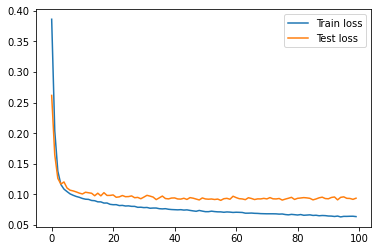

In [33]:
plt.plot(proceso.history['loss'], label='Train loss')
plt.plot(proceso.history['val_loss'], label='Test loss')
plt.legend();

#Se observa un valor de pérdida que se aleja entre los conjuntos de prueba y entrenamiento, lo que indica que le modelo se está sobreajustando para la cantidad de épocas entrenadas
#Es probable que para una menor cantidad de épocas se optengas resultados con menor sobreajuste del conjunto de entrenamiento

**Validación accuracy**

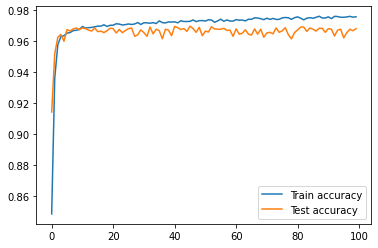

In [34]:
plt.plot(proceso.history['accuracy'], label='Train accuracy')
plt.plot(proceso.history['val_accuracy'], label='Test accuracy')
plt.legend();
#Para ambos modelos se observa que la exactitud se mantiene en valores similares y por encima del 95%, tanto para el conjunto de entrenamiento como para el conjunto de prueba.
#Pero en el caso del conjunto de prueba se observa una instabilidad en los valores obtenidos, se considera que con menos cantidad de épocas se podría obtener un mejor desempeño,
# o similar.

**Resumen de score de prueba y métricas**

In [35]:
score = model.evaluate(X_test_pca, y_test)
print('Val accuracy:', score[1])

157/157 [==============================] - 1s 4ms/step - loss: 0.0936 - accuracy: 0.9682 - auc: 0.9932 - precision: 0.9781 - recall: 0.9478
Val accuracy: 0.9682000279426575


####**MODELO 2**

Se traba de reducir la cantidad época y se agrega un drop out para tratar de reducir el sobreajuste y aumentando el número de neuronas

In [125]:
model = Sequential()
# Primera capa oculta
model.add(Dense(32, 
                input_dim = input_shape,
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy','AUC','Precision','Recall'])
proceso = model.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=20)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3942 - accuracy: 0.8444 - auc: 0.9047 - precision: 0.8720 - recall: 0.7509 - val_loss: 0.2720 - val_accuracy: 0.9058 - val_auc: 0.9418 - val_precision: 0.9353 - val_recall: 0.8406
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2546 - accuracy: 0.9123 - auc: 0.9490 - precision: 0.9320 - recall: 0.8602 - val_loss: 0.2127 - val_accuracy: 0.9298 - val_auc: 0.9608 - val_precision: 0.9632 - val_recall: 0.8711
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2044 - accuracy: 0.9335 - auc: 0.9640 - precision: 0.9583 - recall: 0.8850 - val_loss: 0.1732 - val_accuracy: 0.9474 - val_auc: 0.9750 - val_precision: 0.9867 - val_recall: 0.8905
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1796 - accuracy: 0.9421 - auc: 0.9715 - precision: 0.9610 - recall: 0.9030 - val_loss: 0.1475 - val_accuracy: 0.9578 - val_auc: 0.9828 - val_precision: 0.99

**Validación de la pérdida**

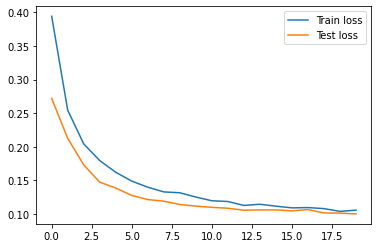

In [126]:
plt.plot(proceso.history['loss'], label='Train loss')
plt.plot(proceso.history['val_loss'], label='Test loss')
plt.legend();

#Se observa un valor de pérdida cercano para los conjuntos de prueba y entrenamiento, lo que indica que le modelo no se está sobreajustando para la cantidad de épocas entrenadas
#Además, el agregar el droput facilita el entrenamiento de modelo

**Validación accuracy**

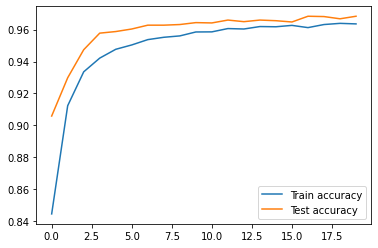

In [127]:
plt.plot(proceso.history['accuracy'], label='Train accuracy')
plt.plot(proceso.history['val_accuracy'], label='Test accuracy')
plt.legend();
#Para ambos modelos se observa que la exactitud se mantiene en valores similares y por encima del 95%, tanto para el conjunto de entrenamiento como para el conjunto de prueba.

**Resumen de score de prueba y métricas**

In [128]:
score = model.evaluate(X_test_pca, y_test)
print('Val accuracy:', score[1])

157/157 [==============================] - 1s 4ms/step - loss: 0.1003 - accuracy: 0.9684 - auc: 0.9909 - precision: 0.9845 - recall: 0.9418
Val accuracy: 0.9684000015258789


####**MODELO 3**

Se agrega otra capa oculta y se escalonan la cantidad de neuronas y se ponenen dropout entre la primera y segunda capa y entre la segunda y tercera capa.

In [121]:
model = Sequential()
# Primera capa oculta
model.add(Dense(64, 
                input_dim = input_shape,
                activation = 'relu'))
#Se agrega un Droout para prevenir el sobre ajuste en el entrenamiento
model.add(Dropout(0.2))
model.add(Dense(32, 
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
early_stopping = EarlyStopping(patience=5)
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy','AUC','Precision','Recall'])
proceso = model.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=20,
                    callbacks = [early_stopping]) #Se agrega una parada

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.3284 - accuracy: 0.8763 - auc: 0.9293 - precision: 0.8770 - recall: 0.8308 - val_loss: 0.2012 - val_accuracy: 0.9358 - val_auc: 0.9601 - val_precision: 0.9671 - val_recall: 0.8818
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1892 - accuracy: 0.9393 - auc: 0.9651 - precision: 0.9643 - recall: 0.8930 - val_loss: 0.1470 - val_accuracy: 0.9584 - val_auc: 0.9811 - val_precision: 0.9905 - val_recall: 0.9127
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1530 - accuracy: 0.9517 - auc: 0.9770 - precision: 0.9728 - recall: 0.9141 - val_loss: 0.1248 - val_accuracy: 0.9606 - val_auc: 0.9885 - val_precision: 0.9910 - val_recall: 0.9173
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1346 - accuracy: 0.9548 - auc: 0.9839 - precision: 0.9716 - recall: 0.9226 - val_loss: 0.1157 - val_accuracy: 0.9616 - val_auc: 0.9895 - val_precision: 0.98

**Validación de la pérdida**

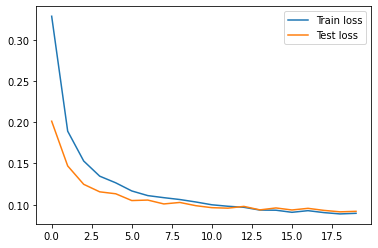

In [122]:
plt.plot(proceso.history['loss'], label='Train loss')
plt.plot(proceso.history['val_loss'], label='Test loss')
plt.legend();

#Se observa un valor de pérdida cercano para los conjuntos de prueba y entrenamiento, lo que indica que le modelo no se está sobreajustando para la cantidad de épocas entrenadas
#Además, el agregar el droput facilita el entrenamiento de modelo

**Validación accuracy**

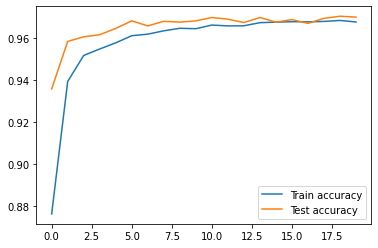

In [123]:
plt.plot(proceso.history['accuracy'], label='Train accuracy')
plt.plot(proceso.history['val_accuracy'], label='Test accuracy')
plt.legend();
#Para ambos modelos se observa que la exactitud se mantiene en valores similares y por encima del 95%, tanto para el conjunto de entrenamiento como para el conjunto de prueba.

**Resumen de score de prueba y métricas**

In [124]:
score = model.evaluate(X_test_pca, y_test)
print('Val accuracy:', score[1])

157/157 [==============================] - 1s 4ms/step - loss: 0.0920 - accuracy: 0.9700 - auc: 0.9925 - precision: 0.9907 - recall: 0.9395
Val accuracy: 0.9700000286102295


###**Conclusión**

Se elige el modelo 3, ya que si bien el early stopping no se activó, la nueva configuración permitió que la pérdida fuera aún menor que el modelo 2 y se lograran desempeños de 97% para el conjunto de entrenamiento.